# Problem Statement
Management of hyperglycemia (refers to high levels of sugar, or glucose, in the blood) in hospitalized patients has a significant bearing on outcome, in terms of both morbidity and mortality. However, there are few national assessments of diabetes care during hospitalization which could serve as a baseline for change. This analysis of a large clinical database was undertaken to provide such an assessment and to find future directions which might lead to improvements in patient safety.  
  
Based on the given data, build a model to predict whether the patient is suffering from Diabetes or not? 


**Data Dictionary**
![alt text](image.png "Data Dictionary")

## Importing all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Loading the Data

In [2]:
df = pd.read_csv("dataset_diabetes_diabetic_data.csv")

## Checking the data

In [3]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


## Dropping unwanted variables

In [4]:
df=df.drop(["patient_nbr"],axis=1) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70180 entries, 0 to 70179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      70180 non-null  object
 1   gender                    70180 non-null  object
 2   age                       70180 non-null  object
 3   admission_type_id         70180 non-null  int64 
 4   discharge_disposition_id  70180 non-null  int64 
 5   admission_source_id       70180 non-null  int64 
 6   time_in_hospital          70180 non-null  int64 
 7   num_lab_procedures        70180 non-null  int64 
 8   num_procedures            70180 non-null  int64 
 9   num_medications           70180 non-null  int64 
 10  number_outpatient         70180 non-null  int64 
 11  number_emergency          70180 non-null  int64 
 12  number_inpatient          70180 non-null  int64 
 13  diag_1                    70180 non-null  object
 14  diag_2                

In [6]:
df1=df.copy()
df1['race'] = df1['race'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70180 entries, 0 to 70179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   race                      70180 non-null  category
 1   gender                    70180 non-null  object  
 2   age                       70180 non-null  object  
 3   admission_type_id         70180 non-null  int64   
 4   discharge_disposition_id  70180 non-null  int64   
 5   admission_source_id       70180 non-null  int64   
 6   time_in_hospital          70180 non-null  int64   
 7   num_lab_procedures        70180 non-null  int64   
 8   num_procedures            70180 non-null  int64   
 9   num_medications           70180 non-null  int64   
 10  number_outpatient         70180 non-null  int64   
 11  number_emergency          70180 non-null  int64   
 12  number_inpatient          70180 non-null  int64   
 13  diag_1                    70180 non-null  obje

diabatic is the target variable while all others are the predictors.  
  
Out of the 19 columns, 8 are object type, while remaining 11 are int.  
<b>Object</b> - race, gender, age, diag_1, diag_2, diag_3, change, diabatic  
<b>Int</b> -admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, number_diagnoses
  
Since label encoding is already present in the data, some of the nominal variables are displayed as int.  
Actual Nominal variables are 12:
race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, diag_1, diag_2, diag_3, number_diagnoses, change, diabatic.
  
Actual Numeric variables are 7:
time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient

  
It appears there are also no missing values.

## Check for missing value in any column

In [7]:
# Are there any missing values ?
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

## Summary of the data

In [9]:
df.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.90,0.95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
admission_type_id,70180.0,2.121730,1.532443,1.0,1.0,1.0,1.0,1.0,3.0,5.0,6.0,8.0
discharge_disposition_id,70180.0,3.981305,5.657360,1.0,1.0,1.0,1.0,1.0,5.0,11.0,18.0,28.0
admission_source_id,70180.0,5.926404,4.424962,1.0,1.0,1.0,1.0,7.0,7.0,7.0,17.0,20.0
time_in_hospital,70180.0,4.439370,3.032789,1.0,1.0,1.0,2.0,4.0,6.0,9.0,11.0,14.0
num_lab_procedures,70180.0,42.670020,19.197482,1.0,7.0,16.0,31.0,44.0,56.0,67.0,73.0,129.0
num_procedures,70180.0,1.350043,1.683676,0.0,0.0,0.0,0.0,1.0,2.0,4.0,5.0,6.0
num_medications,70180.0,15.338772,8.071803,1.0,5.0,7.0,10.0,14.0,19.0,25.0,30.0,81.0
number_outpatient,70180.0,0.294543,1.052725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,36.0
number_emergency,70180.0,0.156312,0.722395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,64.0
number_inpatient,70180.0,0.605130,1.229140,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,21.0


In [ ]:
sns.boxplot(df['num_medications'], whis=3)

In [ ]:
sns.distplot(df['num_lab_procedures'])

In [ ]:
df.describe(include='object')

In [ ]:
df.head(10)

Some variables has invalid character "?"

## Geting unique counts of all Nominal Variables

In [10]:
for column in df[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                   'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'change', 'diabatic']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts())
    print('\n*************************************************\n')

RACE :  6
Caucasian          51123
AfricanAmerican    15008
?                   1461
Hispanic            1341
Other                874
Asian                373
Name: race, dtype: int64

*************************************************

GENDER :  3
Female             38061
Male               32117
Unknown/Invalid        2
Name: gender, dtype: int64

*************************************************

AGE :  10
[70-80)     18099
[60-70)     15231
[50-60)     12131
[80-90)     11261
[40-50)      6937
[30-40)      2779
[90-100)     1844
[20-30)      1178
[10-20)       563
[0-10)        157
Name: age, dtype: int64

*************************************************

ADMISSION_TYPE_ID :  8
1    35631
2    13443
3    12171
6     4584
5     4133
8      202
4        8
7        8
Name: admission_type_id, dtype: int64

*************************************************

DISCHARGE_DISPOSITION_ID :  26
1     41492
3      8666
6      8199
18     3677
2      1529
11     1255
22     1196
5      1031
25 

In [11]:
for column in df[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                   'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'change', 'diabatic']]:
    print(column.upper(), 'contains ?', ': ',(df[column] == "?").sum())
    print(column.upper(),': ',(df[column] == "*").sum())
    print(column.upper(),': ',(df[column] == "%").sum())
    print(column.upper(),': ',(df[column] == "&").sum())

RACE contains ? :  1461
RACE :  0
RACE :  0
RACE :  0
GENDER contains ? :  0
GENDER :  0
GENDER :  0
GENDER :  0
AGE contains ? :  0
AGE :  0
AGE :  0
AGE :  0
ADMISSION_TYPE_ID contains ? :  0
ADMISSION_TYPE_ID :  0
ADMISSION_TYPE_ID :  0
ADMISSION_TYPE_ID :  0
DISCHARGE_DISPOSITION_ID contains ? :  0
DISCHARGE_DISPOSITION_ID :  0
DISCHARGE_DISPOSITION_ID :  0
DISCHARGE_DISPOSITION_ID :  0
ADMISSION_SOURCE_ID contains ? :  0
ADMISSION_SOURCE_ID :  0
ADMISSION_SOURCE_ID :  0
ADMISSION_SOURCE_ID :  0
DIAG_1 contains ? :  19
DIAG_1 :  0
DIAG_1 :  0
DIAG_1 :  0
DIAG_2 contains ? :  304
DIAG_2 :  0
DIAG_2 :  0
DIAG_2 :  0
DIAG_3 contains ? :  1237
DIAG_3 :  0
DIAG_3 :  0
DIAG_3 :  0
NUMBER_DIAGNOSES contains ? :  0
NUMBER_DIAGNOSES :  0
NUMBER_DIAGNOSES :  0
NUMBER_DIAGNOSES :  0
CHANGE contains ? :  0
CHANGE :  0
CHANGE :  0
CHANGE :  0
DIABATIC contains ? :  0
DIABATIC :  0
DIABATIC :  0
DIABATIC :  0


race, diag1, diag2 and diag3 has ?

diag1, diag2, diag3 — are categorical and have a lot of values. We will remove these and use number_diagnoses to capture some of this information.

In [12]:
print('Before Removing: ',df.shape)
df=df.drop(["diag_1","diag_2","diag_3"],axis=1) 
print('After Removing: ',df.shape)

Before Removing:  (70180, 19)
After Removing:  (70180, 16)


This leaves us with 1461 values in race variable that has ?  
Since this is a categorical variable, we can either have these as a separate group, or we will remove them, since we still have sufficient data

In [13]:
print('Before: ',df.shape)
# Replace ? to Nan and remove all missing values
df.race = df.race.replace(to_replace = '?', value =np.nan)
df.dropna(inplace=True)
print('After: ',df.shape)

Before:  (70180, 16)
After:  (68719, 16)


## Check for duplicate data

In [14]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 22


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
4722,AfricanAmerican,Female,[10-20),1,1,7,3,51,0,3,0,0,0,1,No,Yes
17298,Caucasian,Female,[20-30),3,1,1,3,22,1,15,0,0,0,7,No,No
18111,Caucasian,Male,[70-80),1,18,7,2,40,0,9,0,0,0,6,Ch,Yes
23475,Caucasian,Male,[0-10),1,1,7,3,47,0,5,0,0,0,1,No,Yes
23932,AfricanAmerican,Female,[50-60),1,1,7,2,34,0,8,0,0,0,4,No,Yes
34892,AfricanAmerican,Female,[50-60),1,1,7,1,46,0,10,0,0,0,6,No,Yes
41130,Caucasian,Female,[50-60),1,1,7,1,41,0,8,0,0,0,5,Ch,Yes
44590,Caucasian,Male,[70-80),1,1,7,1,32,0,4,0,0,0,3,No,Yes
54543,Caucasian,Male,[80-90),1,1,7,2,57,0,11,0,0,0,9,Ch,Yes
56744,AfricanAmerican,Male,[70-80),1,1,7,4,45,0,15,0,0,0,9,Ch,Yes


## Removing Duplicates

In [15]:
df.drop_duplicates(inplace=True) 

In [16]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(68697, 16)


## Checking for Outliers

<AxesSubplot:>

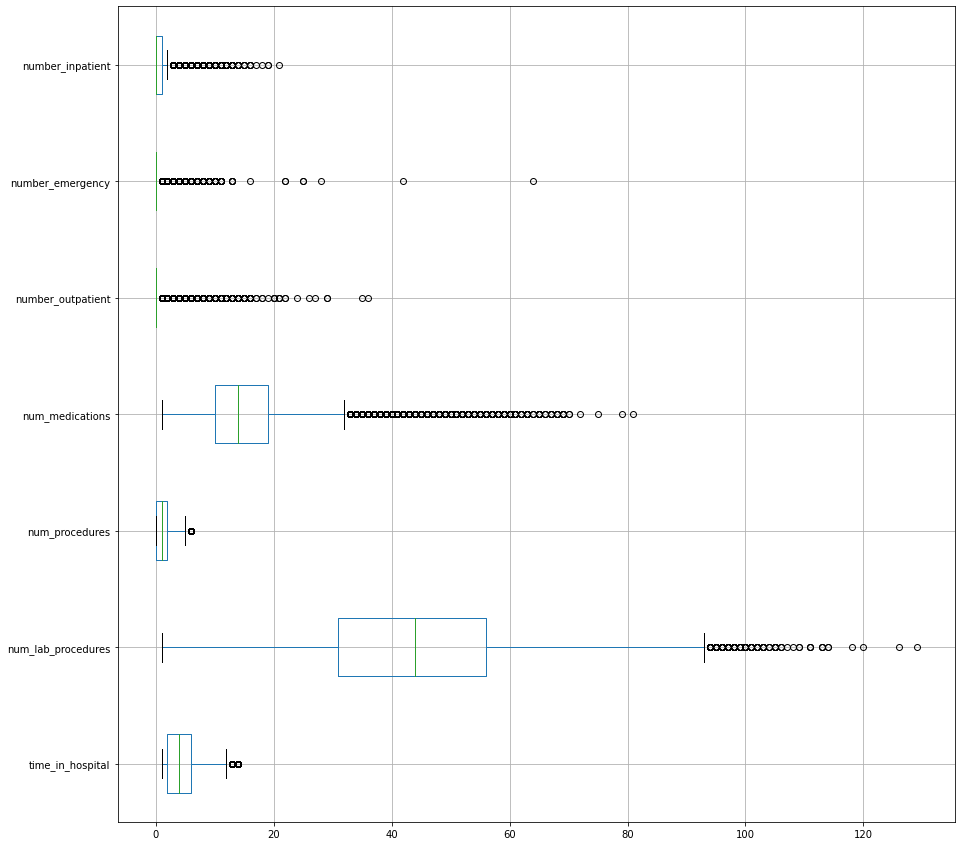

In [17]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']].boxplot(vert=0)

C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_medications'>

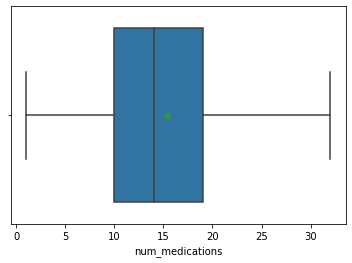

In [20]:
sns.boxplot(df['num_medications'], showfliers=False, showmeans=True)

<AxesSubplot:xlabel='time_in_hospital', ylabel='num_medications'>

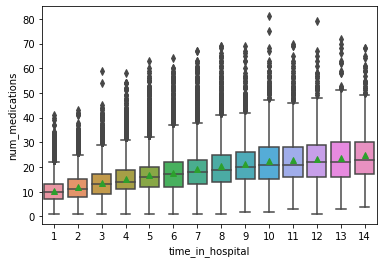

In [21]:
sns.boxplot(x=df['time_in_hospital'], y= df['num_medications'], showmeans=True)

In [ ]:
df['time_in_hospital'].value_counts(normalize=True)

There are outliers in all the variables. Random Forest and ANN can handle the outliers. 
Hence, Outliers are not treated for now, we will keep the data as it is. However students are encouraged to do the outliers treatment and compare the model performances.


## Checking pairwise distribution of the continuous variables

In [ ]:
sns.pairplot(df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']])

## Checking for Correlations

<AxesSubplot:>

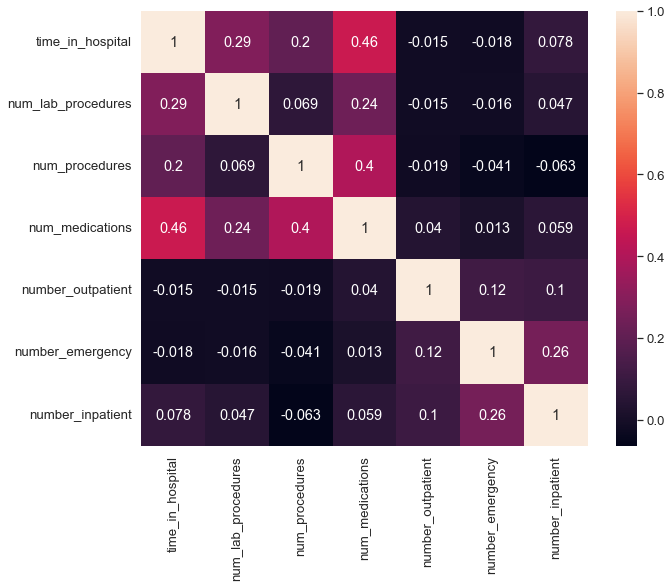

In [22]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']].corr(), annot=True)

There are mostly positive correlations between variables, and very few negative correlations.  
Overall the magnitude of correlations between the variables are very less.

In [ ]:
# 0 : No Relation
# 0 - 0.25 : Insignificant
# 0.25 - 0.5 : Weak
# 0.5 - 0.75 : Strong
# 0.75 - 1 : Significant      ### Multi-collinearity

## Converting all objects to categorical codes

In [23]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: race
['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
[2 0 4 1 3]


feature: gender
['Female', 'Male', 'Unknown/Invalid']
Categories (3, object): ['Female', 'Male', 'Unknown/Invalid']
[0 1 2]


feature: age
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)', '[80-90)', '[90-100)']
[0 1 2 3 4 5 6 7 8 9]


feature: change
['No', 'Ch']
Categories (2, object): ['Ch', 'No']
[1 0]


feature: diabatic
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [ ]:
# df['variable'] = df['variable'].replace(['value1', 'value2'], [0,1,2,3])

In [ ]:
df.info()

In [ ]:
df.head()

C:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

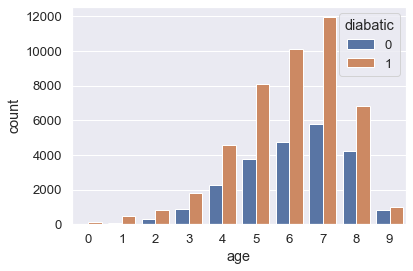

In [24]:
sns.countplot(df['age'], hue=df['diabatic'])

<AxesSubplot:xlabel='age'>

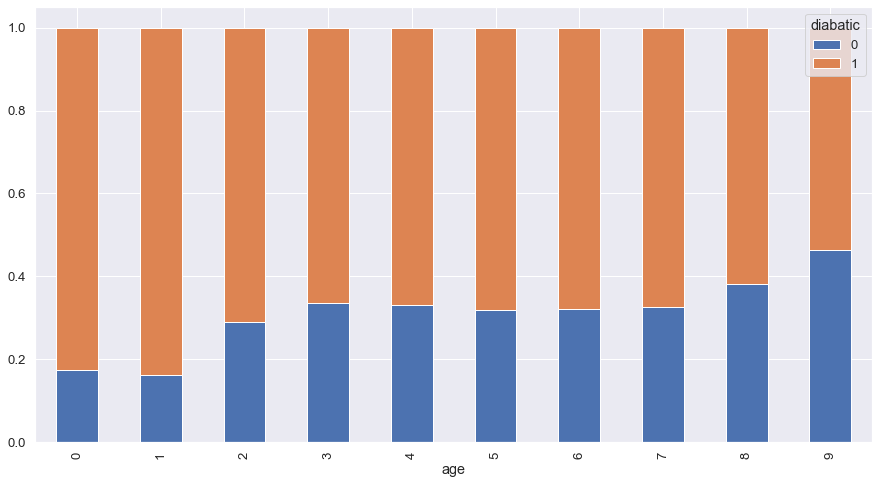

In [25]:
pd.crosstab(df['age'], df['diabatic'], normalize='index').plot(kind='bar', stacked=True, figsize=(15,8))

In [26]:
pd.crosstab(df['age'], df['diabatic'], margins=True)

diabatic,0,1,All
age,,,
0,27,128,155
1,91,468,559
2,329,811,1140
3,910,1811,2721
4,2240,4548,6788
5,3778,8095,11873
6,4774,10122,14896
7,5793,11941,17734
8,4215,6812,11027


<AxesSubplot:xlabel='time_in_hospital'>

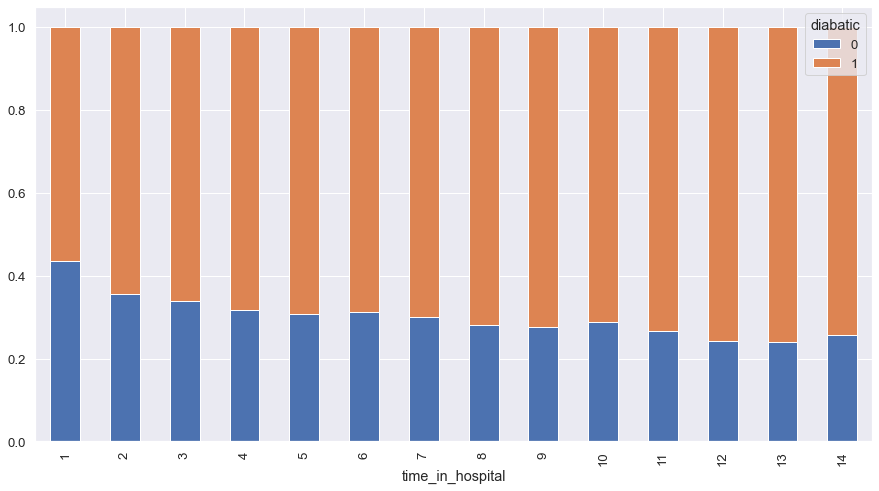

In [27]:
pd.crosstab(df['time_in_hospital'], df['diabatic'], normalize='index').plot(kind='bar', stacked=True, figsize=(15,8))

In [28]:
pd.crosstab(df['time_in_hospital'], df['diabatic'], margins=True, normalize='columns')

diabatic,0,1,All
time_in_hospital,,,
1,0.184594,0.120159,0.141724
2,0.179592,0.163283,0.168741
3,0.169675,0.167046,0.167926
4,0.128311,0.138275,0.134940
5,0.089296,0.100950,0.097049
6,0.069331,0.077058,0.074472
7,0.052064,0.060692,0.057805
8,0.037449,0.048396,0.044733
9,0.024792,0.032687,0.030045


## Proportion of 1s and 0s

In [29]:
df.diabatic.value_counts(normalize=True)
#SMOTE

1    0.665327
0    0.334673
Name: diabatic, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

## Extracting the target column into separate vectors for training set and test set

In [30]:
X = df.drop("diabatic", axis=1)

y = df.pop("diabatic")

#X.head()

## Splitting data into training and test set

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

## Checking the dimensions of the training and test data

In [32]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (48087, 15)
X_test (20610, 15)
train_labels (48087,)
test_labels (20610,)


In [57]:
# Standard Scaler - Normality assuption
# MinMax - everywhere else

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

# Building a Decision Tree Classifier

In [38]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [8,10,12,14,15,20,25],   # 10-15
    'min_samples_leaf': [25,100,150],   # min_sample_split/3
    'min_samples_split': [300,150,450],   # 2%-3% (preference to cap @100)
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10, scoring='recall')

In [39]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 25, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=20, min_samples_leaf=25, min_samples_split=150,
                       random_state=1)

## Generating Tree

In [35]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

## Variable Importance

In [40]:
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                               Imp
change                    0.787610
num_medications           0.052626
number_diagnoses          0.026443
num_lab_procedures        0.025243
age                       0.016970
admission_source_id       0.016361
num_procedures            0.013333
discharge_disposition_id  0.012235
time_in_hospital          0.011269
admission_type_id         0.010184
number_outpatient         0.006823
number_inpatient          0.006769
race                      0.006747
number_emergency          0.003754
gender                    0.003634


## Predicting on Training and Test dataset

In [41]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [ ]:
ytrain_predict

In [46]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.000000,1.000000
1,0.258065,0.741935
2,0.000000,1.000000
3,0.322148,0.677852
4,0.772152,0.227848


In [47]:
pred12 = pd.DataFrame(ytest_predict_prob)
predclass = np.where(pred12[1]> 0.25, 1, 0)
predclass

array([1, 1, 1, ..., 1, 1, 1])

## Model Evaluation

### AUC and ROC for the training data

AUC: 0.866


Text(0, 0.5, 'True Positive Rate')

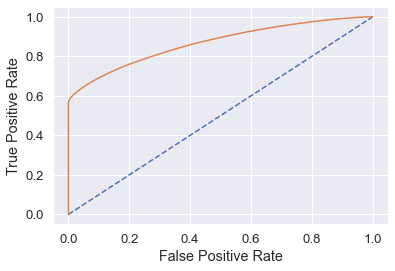

In [44]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### AUC and ROC for the test data

AUC: 0.831


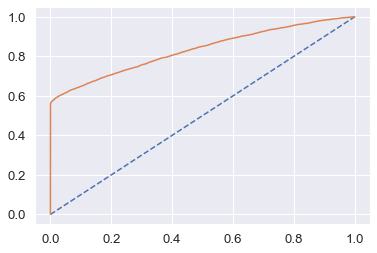

In [45]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [ ]:
confusion_matrix(train_labels, ytrain_predict)

In [ ]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

In [42]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68     16017
           1       0.85      0.80      0.83     32070

    accuracy                           0.78     48087
   macro avg       0.75      0.76      0.75     48087
weighted avg       0.78      0.78      0.78     48087



In [48]:
print(classification_report(test_labels, predclass))

              precision    recall  f1-score   support

           0       0.73      0.13      0.22      6974
           1       0.69      0.98      0.81     13636

    accuracy                           0.69     20610
   macro avg       0.71      0.55      0.51     20610
weighted avg       0.70      0.69      0.61     20610



In [ ]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

### Confusion Matrix for test data

In [ ]:
confusion_matrix(test_labels, ytest_predict)

In [ ]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

In [43]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63      6974
           1       0.82      0.77      0.80     13636

    accuracy                           0.74     20610
   macro avg       0.71      0.72      0.72     20610
weighted avg       0.75      0.74      0.74     20610



In [ ]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

# Cart Conclusion

<b>Train Data:</b>  
    AUC: 85%        
    Accuracy: 75%             
    Precision: 84%        
    f1-Score: 81%       
            
<b>Test Data:</b>      
    AUC: 84%      
    Accuracy: 74%         
    Precision: 84%       
    f1-Score: 81%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Change is the most important variable for predicting diabetes

# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher execution time, so the best values that came after the search are directly put in Param_grid. Students can try on there own.

In [49]:
param_grid = {
    'max_depth': [10,12],## 20,30,40
    'max_features': [4,8],## 7,8,9
    'min_samples_leaf': [35],## 50,100
    'min_samples_split': [100], ## 60,70
    'n_estimators': [101] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [ ]:
StartifiedkFoldCV

In [50]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 12], 'max_features': [4, 8],
                         'min_samples_leaf': [35], 'min_samples_split': [100],
                         'n_estimators': [101]})

In [51]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 4,
 'min_samples_leaf': 35,
 'min_samples_split': 100,
 'n_estimators': 101}

In [52]:
best_grid = grid_search.best_estimator_

In [53]:
best_grid

RandomForestClassifier(max_depth=12, max_features=4, min_samples_leaf=35,
                       min_samples_split=100, n_estimators=101, random_state=1)

## Predicting the Training and Testing data

In [54]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [ ]:
confusion_matrix(train_labels,ytrain_predict)

In [ ]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

In [55]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69     16017
           1       0.86      0.79      0.83     32070

    accuracy                           0.78     48087
   macro avg       0.75      0.77      0.76     48087
weighted avg       0.79      0.78      0.78     48087



In [ ]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

In [ ]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [ ]:
confusion_matrix(test_labels,ytest_predict)

In [ ]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

In [56]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67      6974
           1       0.84      0.77      0.81     13636

    accuracy                           0.76     20610
   macro avg       0.73      0.75      0.74     20610
weighted avg       0.77      0.76      0.76     20610



In [ ]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

In [ ]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [ ]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 87%        
    Accuracy: 77%           
    Precision: 88%        
    f1-Score: 82%       
            
<b>Test Data:</b>      
    AUC: 85%      
    Accuracy: 75%          
    Precision: 86%       
    f1-Score: 80%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Change is again the most important variable for predicting diabetes

# Building a Neural Network Classifier

In [58]:
param_grid = {
    'hidden_layer_sizes': [8], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam', 'sgd'], #sgd
    'tol': [0.001, 0.0001], # ETA (Learning Rate)
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [59]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 8, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.0001}

In [60]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=8, max_iter=2500, random_state=1)

## Predicting the Training and Testing data

In [61]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## NN Model Performance Evaluation on Training data

In [ ]:
confusion_matrix(train_labels,ytrain_predict)

In [ ]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

In [62]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.60      0.74      0.67     16017
           1       0.85      0.76      0.80     32070

    accuracy                           0.75     48087
   macro avg       0.73      0.75      0.73     48087
weighted avg       0.77      0.75      0.76     48087



In [ ]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

In [ ]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [ ]:
confusion_matrix(test_labels,ytest_predict)

In [ ]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

In [63]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      6974
           1       0.85      0.76      0.80     13636

    accuracy                           0.75     20610
   macro avg       0.73      0.75      0.74     20610
weighted avg       0.77      0.75      0.76     20610



In [ ]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

In [ ]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [ ]:
best_grid.score

# Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 84%        
    Accuracy: 73%          
    Precision: 87%        
    f1-Score: 78%     
            
<b>Test Data:</b>      
    AUC: 84%      
    Accuracy: 73%        
    Precision: 87%       
    f1-Score: 78%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

## ROC Curve for the 3 models on the Training data

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, the variable change is found to be the most useful feature amongst all other features for predicting if a person has diabetes or not. If change is yes, then those patients have more chances of getting diabetes.